# The Cervix Recongition  Project

**Is it an image of the cervix or not?**

**Author: Andrii Kobyliuk**

# PART 0 - Preparing
**Import Libaries**

In [2]:
from random import randint
import os
import numpy as np 
import pandas as pd
import cv2

import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
import seaborn as sns

from IPython.display import SVG

from sklearn.utils import shuffle
from sklearn.preprocessing import MaxAbsScaler

import keras
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

from sklearn.model_selection import train_test_split

# PART 1 - Data Sets

In [3]:
image_size = (128, 128)

**Helper Function For Image Extraction**

In [42]:
train_images_labels = []

def get_images(directory, type_id):
    Images = []
    for dirname, _, filenames in os.walk(directory):
        current, total = 0, len(filenames)
        print(dirname)
        for filename in sorted(filenames):
            image = cv2.imread(os.path.join(dirname, filename))
            image = cv2.resize(image,image_size)
            if image.all() == None:
                continue
            Images.append(image)
            train_images_labels.append(type_id)
            current += 1
            if current % (int(total / 10)) == 0:
                print(round(current/total * 100) , "%")
       
    return Images 

**Load Cervical Cancer Images**

In [43]:
cervical_train_images = get_images('../input/224-224-cervical-cancer-screening/kaggle/train/train', 1)
cervical_train_images.extend(get_images('../input/224-224-cervical-cancer-screening/kaggle/additional_Type_1_v2', 1))
cervical_train_images.extend(get_images('../input/224-224-cervical-cancer-screening/kaggle/additional_Type_2_v2', 1))
cervical_train_images.extend(get_images('../input/224-224-cervical-cancer-screening/kaggle/additional_Type_3_v2', 1))

print('Cervical images: ', len(cervical_train_images))

../input/224-224-cervical-cancer-screening/kaggle/train/train
../input/224-224-cervical-cancer-screening/kaggle/train/train/Type_2
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/224-224-cervical-cancer-screening/kaggle/train/train/Type_3
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/224-224-cervical-cancer-screening/kaggle/train/train/Type_1
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/224-224-cervical-cancer-screening/kaggle/additional_Type_1_v2
../input/224-224-cervical-cancer-screening/kaggle/additional_Type_1_v2/Type_1
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/224-224-cervical-cancer-screening/kaggle/additional_Type_2_v2
../input/224-224-cervical-cancer-screening/kaggle/additional_Type_2_v2/Type_2
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/224-224-cervical-cancer-screening/kaggle/additional_Type_3_v2
../input/224-224-cervical-cancer-screening/kaggle/additional_Type_3_v2/Type_3
10 %
20 %
30 %
40 %
50 %
60 %

**Show Train Cervical Cancer Samples**

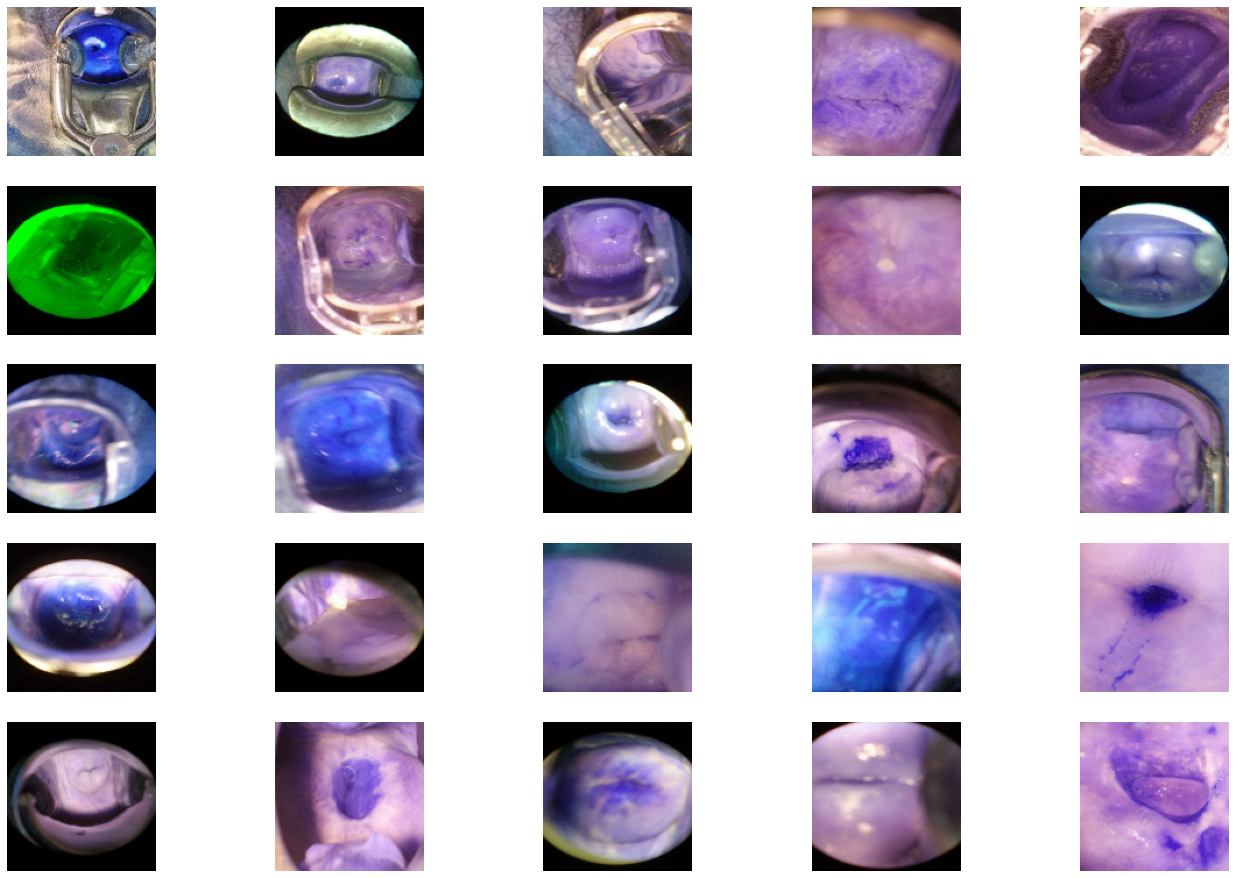

In [81]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(cervical_train_images))
        image = cervical_train_images[rnd_number]
        ax[i,j].imshow(image)
        ax[i,j].axis('off')

**Load The Other Images**

In [44]:
other_train_images =  get_images('../input/natural-images', 0)

print('Not Cervical images: ', len(other_train_images))

../input/natural-images
../input/natural-images/natural_images
../input/natural-images/natural_images/motorbike
10 %
20 %
30 %
40 %
49 %
59 %
69 %
79 %
89 %
99 %
../input/natural-images/natural_images/airplane
10 %
20 %
30 %
40 %
50 %
59 %
69 %
79 %
89 %
99 %
../input/natural-images/natural_images/flower
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/natural-images/natural_images/dog
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/natural-images/natural_images/fruit
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
../input/natural-images/natural_images/car
10 %
20 %
30 %
40 %
50 %
60 %
69 %
79 %
89 %
99 %
../input/natural-images/natural_images/cat
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
89 %
99 %
../input/natural-images/natural_images/person
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
89 %
99 %
../input/natural-images/data
../input/natural-images/data/natural_images
../input/natural-images/data/natural_images/motorbike
10 %
20 %
30 %
40 %
49 %
59 %
69 %
79 %
89 %

**Show NOT Train Cervical Cancer Samples**

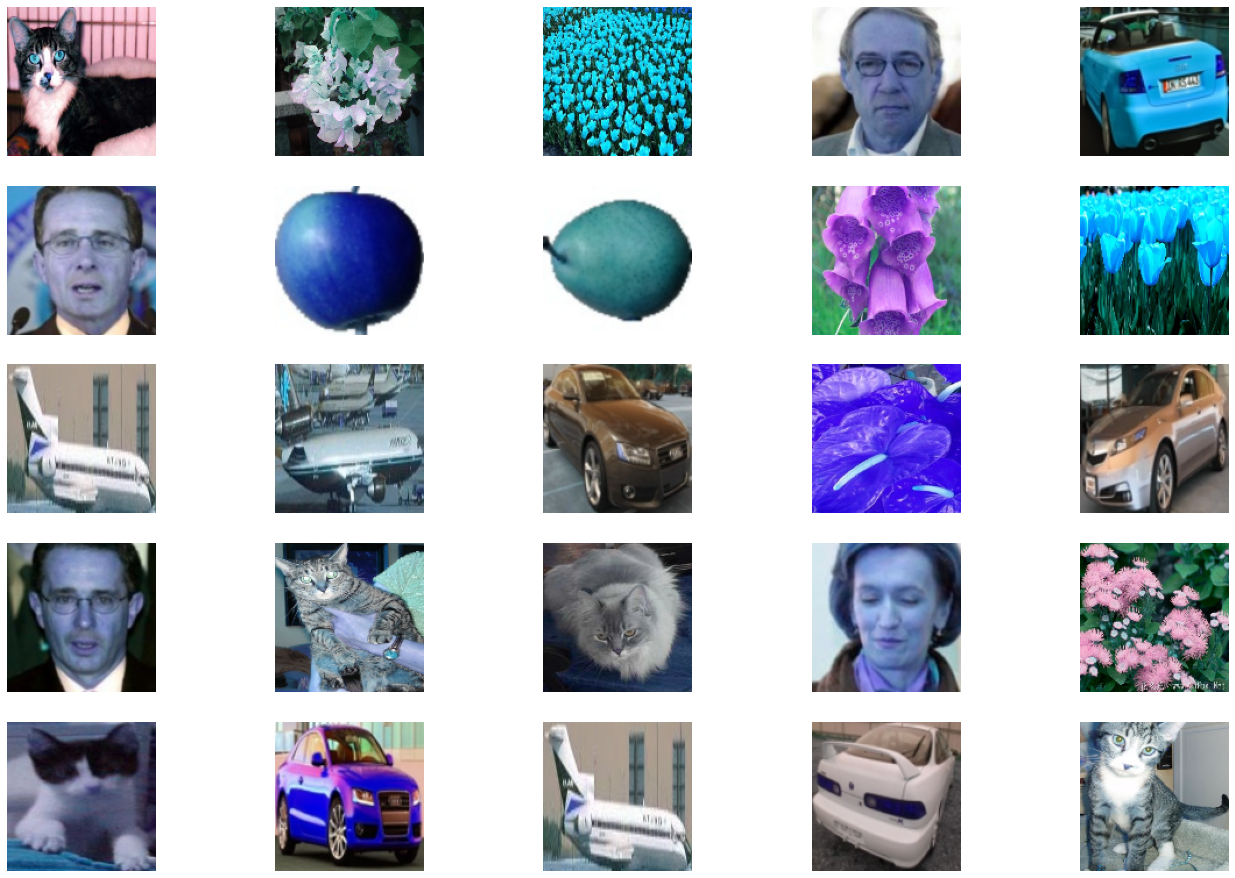

In [80]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(other_train_images))
        image = other_train_images[rnd_number]
        ax[i,j].imshow(image)
        ax[i,j].axis('off')

**Combine Data Sets**

In [45]:
train_images = cervical_train_images + other_train_images

print('Total train images: ', len(train_images))
print('Total train ids: ', len(train_images_labels))

Total train images:  21463
Total train ids:  21463


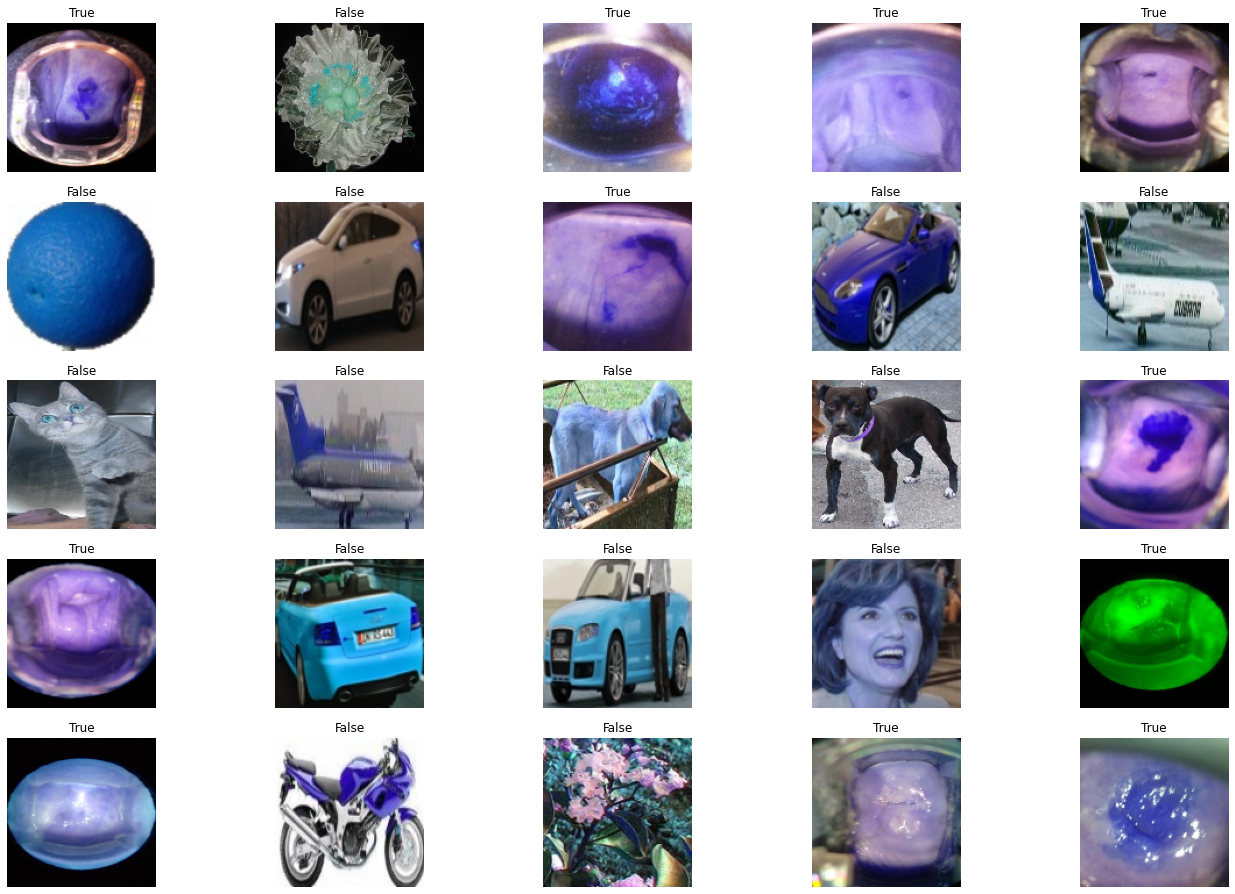

In [49]:
def choose_label(id):
    if id == 1:
        return "True"
    else: 
        return "False"

f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_images))
        image = train_images[rnd_number]
        type_id = train_images_labels[rnd_number]
        ax[i,j].imshow(image)
        ax[i,j].set_title(choose_label(type_id))
        ax[i,j].axis('off')

# PART 2 - Transform Data For Training
**Split Data Into Two Separate Parts For Training And Testing**

In [51]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_images_labels, test_size=0.25, random_state=17)

x_train = np.array(x_train) 
x_test = np.array(x_test)

y_train = np.array(y_train) 
y_train = keras.utils.to_categorical(y_train)

y_test = np.array(y_test)
y_test = keras.utils.to_categorical(y_test)

print("Shape of train images:",x_train.shape)
print("Shape of train labels:",y_train.shape)

print("Shape of test images:",x_test.shape)
print("Shape of test labels:",y_test.shape)

Shape of train images: (17170, 128, 128, 3)
Shape of train labels: (17170, 2)
Shape of test images: (4293, 128, 128, 3)
Shape of test labels: (4293, 2)


# PART 3 - Model Building


**Import Libaries**

In [52]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Activation, merge, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers

**Config declarations**

In [67]:
conf = dict()

conf['num_classes'] = 2
conf['num_channels'] = 3
conf['num_epochs'] = 2
conf['batch_size'] = 64
conf['validation_split'] = 0.35
conf['num_workers'] = 8
conf['image_shape'] = image_size
conf['pooling_strategy'] = MaxPooling2D

**Define Model Arhitecture**

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_27 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
activation_28 (Activation)   (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
activation_29 (Activation)   (None, 62, 62, 32)       

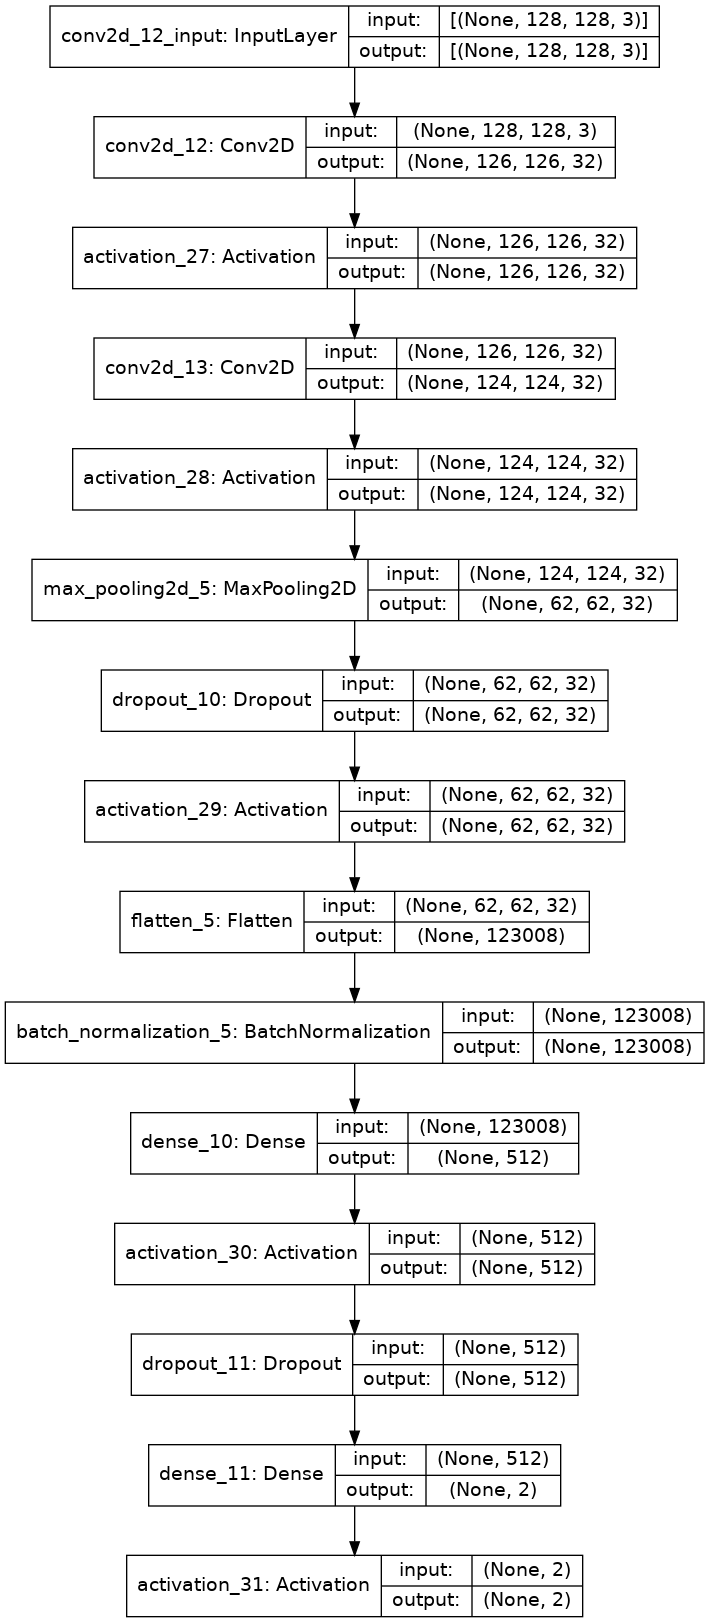

In [68]:
def create_model(conf):
    
    num_channels = conf['num_channels']
    num_classes = conf['num_classes']
    img_rows, img_cols = conf['image_shape']
    PoolingStrategy = conf['pooling_strategy']
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='valid',input_shape=(img_rows, img_cols, num_channels)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3))) 
    model.add(Activation('relu'))
    model.add(PoolingStrategy(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(lr=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])

    return model

model = create_model(conf)
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

# PART 4 - Model Training And Testing
**Training The Model**

In [69]:
training_history = model.fit(x = x_train,
                             y = y_train, 
                             validation_split=conf['validation_split'],  
                             batch_size=conf['batch_size'], 
                             epochs = conf['num_epochs'], 
                             workers =  conf['num_workers'], use_multiprocessing=True)

Epoch 1/2
188/188 [==============================] - 362s 2s/step - loss: 0.4131 - accuracy: 0.9321 - val_loss: 0.1494 - val_accuracy: 0.9773
Epoch 2/2
188/188 [==============================] - 361s 2s/step - loss: 0.1470 - accuracy: 0.9772 - val_loss: 0.0982 - val_accuracy: 0.9878


**List All Data in History**

In [70]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**View History Of Training**

<AxesSubplot:>

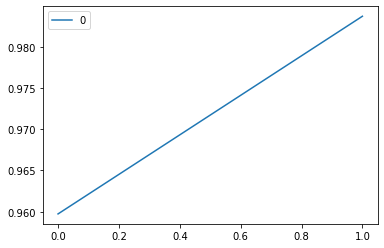

In [71]:
pd.DataFrame(training_history.history['accuracy']).plot()

<AxesSubplot:>

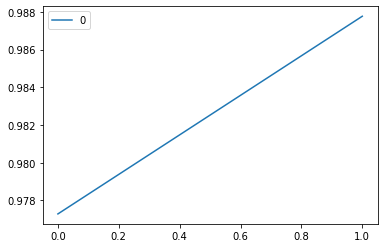

In [72]:
pd.DataFrame(training_history.history['val_accuracy']).plot()

<AxesSubplot:>

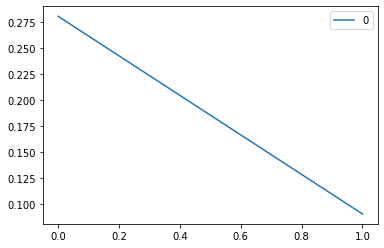

In [73]:
pd.DataFrame(training_history.history['loss']).plot()

<AxesSubplot:>

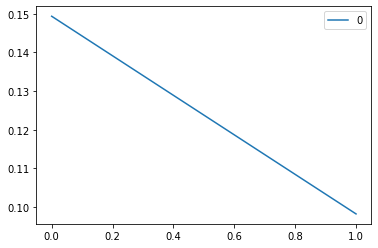

In [74]:
pd.DataFrame(training_history.history['val_loss']).plot()

**Check Accuracy And Loss On Testing Data**

In [76]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Accuracy for test: {accuracy}")
print(f"Loss for test: {loss}")

135/135 [==============================] - 27s 197ms/step - loss: 0.1060 - accuracy: 0.9870
Accuracy for test: 0.9869555234909058
Loss for test: 0.10595330595970154


**Save The Model**

In [79]:
model_name = 'model-0.98'

model_json = model.to_json()
with open(model_name + "json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(model_name + ".h5")